# Exploring and preprocessing the dataset 1

### Imports

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.data_preprocessing import MinMaxNormalization, DataPreprocessor
from src.feature_engineering import FeatureEngineering

## Normal EDA

In [2]:
#Load the data
data_train = pd.read_csv("../data/raw/ec2_request_latency_system_failure_no_anomaly2.csv")
data_test = pd.read_csv("../data/raw/ec2_request_latency_system_failure.csv")

### EDA for train

In [3]:
data_train.shape

(4018, 2)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4018 non-null   object 
 1   value      4018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.9+ KB


In [5]:
data_train.describe()

,value
count,4018.000000
mean,45.146297
std,1.918065
min,36.890000
25%,43.944000
50%,45.015000
75%,46.362000
max,51.972000


In [6]:
data_train.isnull().sum()

timestamp    0
value        0
dtype: int64

### EDA for test

In [7]:
data_test.shape

(4032, 2)

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [9]:
data_test.describe()

,value
count,4032.000000
mean,45.155874
std,2.287089
min,22.864000
25%,43.944000
50%,45.017000
75%,46.362000
max,99.248000


In [10]:
data_test.isnull().sum()

timestamp    0
value        0
dtype: int64

## Feature Engineering

### FE train

In [11]:
# Apply feature engineering
fe = FeatureEngineering(data_train)

In [12]:
data_train = fe.apply_all_features(column="value", datetime_column="timestamp")

# Display processed data
data_train.head()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
0,2014-03-07 03:41:00,45.868,45.868000,NaN,NaN,NaN,45.868000,45.868,45.868,181397.822000,-0.000000,NaN,NaN,NaN,3,7,3,4
1,2014-03-07 03:46:00,47.606,46.737000,1.228952,NaN,NaN,46.737000,47.606,45.868,214.494305,17.516700,45.868,NaN,NaN,3,7,3,4
2,2014-03-07 03:51:00,42.580,45.351333,2.552524,-0.873544,NaN,45.351333,47.606,42.580,-975.958577,492.891987,47.606,45.868,NaN,3,7,3,4
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.521000,47.606,42.580,235.024934,455.627139,42.580,47.606,45.868,3,7,3,4
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.415200,47.606,42.580,402.528227,-233.323281,46.030,42.580,47.606,4,7,3,4


In [13]:
data_train.shape

(4018, 18)

### FE test

In [14]:
# Apply feature engineering
fe = FeatureEngineering(data_test)

In [15]:
data_test = fe.apply_all_features(column="value", datetime_column="timestamp")

# Display processed data
data_test.head()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
0,2014-03-07 03:41:00,45.868,45.868000,NaN,NaN,NaN,45.868000,45.868,45.868,182068.482000,-0.000000,NaN,NaN,NaN,3,7,3,4
1,2014-03-07 03:46:00,47.606,46.737000,1.228952,NaN,NaN,46.737000,47.606,45.868,238.398654,98.855412,45.868,NaN,NaN,3,7,3,4
2,2014-03-07 03:51:00,42.580,45.351333,2.552524,-0.873544,NaN,45.351333,47.606,42.580,-1074.202388,565.070418,47.606,45.868,NaN,3,7,3,4
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.521000,47.606,42.580,115.582759,471.250595,42.580,47.606,45.868,3,7,3,4
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.415200,47.606,42.580,296.162474,-281.344680,46.030,42.580,47.606,4,7,3,4


In [16]:
data_test.shape

(4032, 18)

## EDA after freature engineering

### EDA after FE train

In [17]:
data_train.isnull().sum()

timestamp             0
value                 0
value_mean            0
value_std_dev         1
value_skewness        2
value_kurtosis        3
value_rolling_mean    0
value_rolling_max     0
value_rolling_min     0
value_fft_real        0
value_fft_imag        0
value_lag_1           1
value_lag_2           2
value_lag_3           3
hour                  0
day                   0
month                 0
weekday               0
dtype: int64

In [18]:
data_train.dropna(inplace=True)

In [19]:
data_train.head()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,235.024934,455.627139,42.580,47.606,45.868,3,7,3,4
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,402.528227,-233.323281,46.030,42.580,47.606,4,7,3,4
5,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-601.456733,-105.165394,44.992,46.030,42.580,4,7,3,4
6,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,268.385019,278.381086,45.238,44.992,46.030,4,7,3,4
7,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,143.512119,-41.386363,45.752,45.238,44.992,4,7,3,4


In [20]:
data_train.shape

(4015, 18)

In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 3 to 4017
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           4015 non-null   datetime64[ns]
 1   value               4015 non-null   float64       
 2   value_mean          4015 non-null   float64       
 3   value_std_dev       4015 non-null   float64       
 4   value_skewness      4015 non-null   float64       
 5   value_kurtosis      4015 non-null   float64       
 6   value_rolling_mean  4015 non-null   float64       
 7   value_rolling_max   4015 non-null   float64       
 8   value_rolling_min   4015 non-null   float64       
 9   value_fft_real      4015 non-null   float64       
 10  value_fft_imag      4015 non-null   float64       
 11  value_lag_1         4015 non-null   float64       
 12  value_lag_2         4015 non-null   float64       
 13  value_lag_3         4015 non-null   float64       
 1

In [22]:
data_train.describe()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
count,4015,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.00000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.0,4015.000000
mean,2014-03-14 03:18:19.471980032,45.146144,45.147762,1.799438,0.066484,0.155246,45.147157,47.417190,42.91288,0.911897,-0.127125,45.147231,45.147395,45.147289,11.511083,13.638356,3.0,2.998506
min,2014-03-07 03:56:00,36.890000,43.391400,0.488968,-2.203330,-2.224578,42.265600,43.850000,36.89000,-975.958577,-646.398441,36.890000,36.890000,36.890000,0.000000,7.000000,3.0,0.000000
25%,2014-03-10 15:33:30,43.944000,44.609200,1.483198,-0.368369,-0.881948,44.554800,46.426000,42.16000,-42.499314,-43.309788,43.944000,43.944000,43.944000,6.000000,10.000000,3.0,1.000000
50%,2014-03-14 03:11:00,45.014000,45.053000,1.755106,0.032231,-0.175468,45.042000,47.230000,42.95800,-1.161509,-0.059937,45.014000,45.014000,45.014000,12.000000,14.000000,3.0,3.000000
75%,2014-03-17 14:58:30,46.362000,45.551200,2.085133,0.474527,0.855476,45.652200,48.310000,43.73200,44.680333,43.141898,46.362000,46.362000,46.362000,17.000000,17.000000,3.0,5.000000
max,2014-03-21 03:26:00,51.972000,47.836000,3.566558,2.675957,7.781269,48.331200,51.972000,47.01800,534.912786,646.398441,51.972000,51.972000,51.972000,23.000000,21.000000,3.0,6.000000
std,NaN,1.917928,0.751480,0.460888,0.646560,1.434959,0.850128,1.401701,1.29622,84.663073,85.528516,1.915234,1.915416,1.915365,6.910331,4.036730,0.0,2.002240


### EDA after FE test

In [23]:
data_test.isnull().sum()

timestamp             0
value                 0
value_mean            0
value_std_dev         1
value_skewness        2
value_kurtosis        3
value_rolling_mean    0
value_rolling_max     0
value_rolling_min     0
value_fft_real        0
value_fft_imag        0
value_lag_1           1
value_lag_2           2
value_lag_3           3
hour                  0
day                   0
month                 0
weekday               0
dtype: int64

In [24]:
data_test.dropna(inplace=True)

In [25]:
data_test.head()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,115.582759,471.250595,42.580,47.606,45.868,3,7,3,4
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,296.162474,-281.344680,46.030,42.580,47.606,4,7,3,4
5,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-598.509604,-223.277499,44.992,46.030,42.580,4,7,3,4
6,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,295.483726,281.207942,45.238,44.992,46.030,4,7,3,4
7,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,182.952678,18.691277,45.752,45.238,44.992,4,7,3,4


In [26]:
data_test.shape

(4029, 18)

In [27]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4029 entries, 3 to 4031
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           4029 non-null   datetime64[ns]
 1   value               4029 non-null   float64       
 2   value_mean          4029 non-null   float64       
 3   value_std_dev       4029 non-null   float64       
 4   value_skewness      4029 non-null   float64       
 5   value_kurtosis      4029 non-null   float64       
 6   value_rolling_mean  4029 non-null   float64       
 7   value_rolling_max   4029 non-null   float64       
 8   value_rolling_min   4029 non-null   float64       
 9   value_fft_real      4029 non-null   float64       
 10  value_fft_imag      4029 non-null   float64       
 11  value_lag_1         4029 non-null   float64       
 12  value_lag_2         4029 non-null   float64       
 13  value_lag_3         4029 non-null   float64       
 1

In [28]:
data_test.describe()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday
count,4029,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.0,4029.000000
mean,2014-03-14 03:47:44.512285952,45.155728,45.162255,1.870050,0.069631,0.188891,45.157903,47.524694,42.862200,0.920104,-0.164787,45.158612,45.153982,45.159691,11.506826,13.658972,3.0,2.998759
min,2014-03-07 03:56:00,22.864000,39.145000,0.488968,-2.904545,-2.224578,34.211200,43.850000,22.864000,-1074.202388,-735.360900,22.864000,22.864000,25.352000,0.000000,7.000000,3.0,0.000000
25%,2014-03-10 15:51:00,43.944000,44.605800,1.487088,-0.374090,-0.879749,44.552000,46.426000,42.160000,-58.507071,-61.636740,43.944000,43.944000,43.944000,6.000000,10.000000,3.0,1.000000
50%,2014-03-14 03:46:00,45.016000,45.052800,1.758361,0.029628,-0.160861,45.041200,47.230000,42.934000,0.451994,-0.008407,45.016000,45.016000,45.018000,12.000000,14.000000,3.0,3.000000
75%,2014-03-17 15:46:00,46.362000,45.559000,2.090808,0.475026,0.890996,45.657600,48.334000,43.732000,62.128367,61.545841,46.362000,46.362000,46.362000,18.000000,17.000000,3.0,5.000000
max,2014-03-21 03:41:00,99.248000,54.704200,17.364426,2.932898,8.912017,62.680800,99.248000,47.114000,813.546000,735.360900,99.248000,99.248000,99.248000,23.000000,21.000000,3.0,6.000000
std,NaN,2.287228,0.898518,1.028570,0.666205,1.496210,1.070631,2.407348,1.617319,100.289851,103.271473,2.276628,2.252544,2.225017,6.919115,4.046571,0.0,2.000310


### Scaling the dataset

### Scaling train

In [29]:
data_train.columns

Index(['timestamp', 'value', 'value_mean', 'value_std_dev', 'value_skewness',
       'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
       'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
       'value_lag_2', 'value_lag_3', 'hour', 'day', 'month', 'weekday'],
      dtype='object')

In [30]:
# Select Numeric Features to Scale (Avoiding Categorical & Binary)
features_to_scale = ['value', 'value_mean', 'value_std_dev', 'value_skewness',
       'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
       'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
       'value_lag_2', 'value_lag_3']
# Since Time-based Features are already in a fixed range, we don't need to scale them

In [31]:
# Apply MinMax Scaling
# scaler = MinMaxNormalization()
# preprocessor = DataPreprocessor(strategy=scaler)

# Apply MinMax Normalization
normalizer = DataPreprocessor(MinMaxNormalization())

In [32]:
data_train = normalizer.apply_normalization(data_train, "value")

# Display processed data
data_train.head()

✅ Scaler saved to ../notebooks/scaler_data/scaler.pkl


,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,235.024934,455.627139,42.580,47.606,45.868,3,7,3,4,0.606020
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,402.528227,-233.323281,46.030,42.580,47.606,4,7,3,4,0.537197
5,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-601.456733,-105.165394,44.992,46.030,42.580,4,7,3,4,0.553507
6,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,268.385019,278.381086,45.238,44.992,46.030,4,7,3,4,0.587588
7,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,143.512119,-41.386363,45.752,45.238,44.992,4,7,3,4,0.635592


In [33]:
# columns_to_drop = ['value', 'value_mean', 'value_std_dev', 'value_skewness',
#        'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
#        'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
#        'value_lag_2', 'value_lag_3']
# data.drop(columns=columns_to_drop, inplace=True)

# # Display the dataframe after dropping columns
# data.head()

In [34]:
# # Columns to move to the back
# columns_to_move = ['hour', 'day', 'month', 'weekday']

# # Reorder columns
# data = data[[col for col in data.columns if col not in columns_to_move] + columns_to_move]

# # Display the dataframe after reordering columns
# data.head()

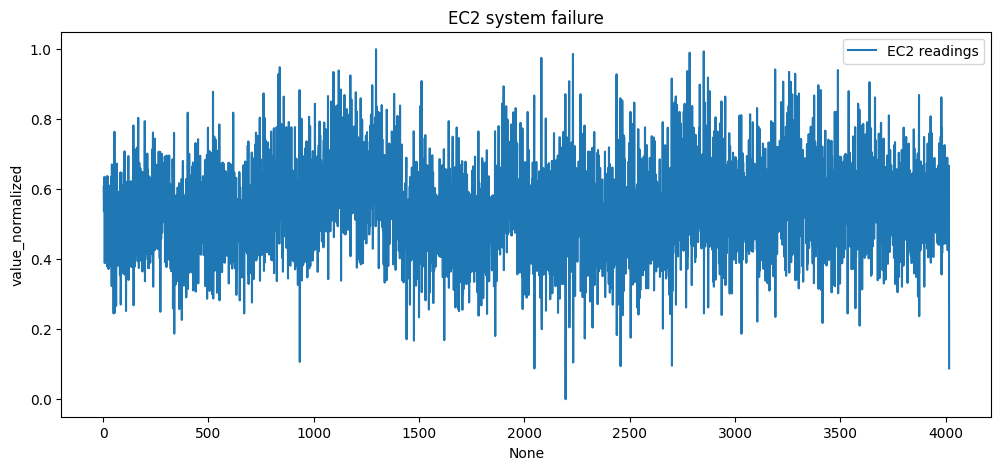

In [35]:
# Visualize Sensor Data
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_train, x=data_train.index, y="value_normalized", label="EC2 readings")
plt.title("EC2 system failure")
plt.show()

In [36]:
data_train.columns

Index(['timestamp', 'value', 'value_mean', 'value_std_dev', 'value_skewness',
       'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
       'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
       'value_lag_2', 'value_lag_3', 'hour', 'day', 'month', 'weekday',
       'value_normalized'],
      dtype='object')

In [37]:
data_train.describe()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized
count,4015,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.00000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.0,4015.000000,4015.000000
mean,2014-03-14 03:18:19.471980032,45.146144,45.147762,1.799438,0.066484,0.155246,45.147157,47.417190,42.91288,0.911897,-0.127125,45.147231,45.147395,45.147289,11.511083,13.638356,3.0,2.998506,0.547417
min,2014-03-07 03:56:00,36.890000,43.391400,0.488968,-2.203330,-2.224578,42.265600,43.850000,36.89000,-975.958577,-646.398441,36.890000,36.890000,36.890000,0.000000,7.000000,3.0,0.000000,0.000000
25%,2014-03-10 15:33:30,43.944000,44.609200,1.483198,-0.368369,-0.881948,44.554800,46.426000,42.16000,-42.499314,-43.309788,43.944000,43.944000,43.944000,6.000000,10.000000,3.0,1.000000,0.467710
50%,2014-03-14 03:11:00,45.014000,45.053000,1.755106,0.032231,-0.175468,45.042000,47.230000,42.95800,-1.161509,-0.059937,45.014000,45.014000,45.014000,12.000000,14.000000,3.0,3.000000,0.538655
75%,2014-03-17 14:58:30,46.362000,45.551200,2.085133,0.474527,0.855476,45.652200,48.310000,43.73200,44.680333,43.141898,46.362000,46.362000,46.362000,17.000000,17.000000,3.0,5.000000,0.628033
max,2014-03-21 03:26:00,51.972000,47.836000,3.566558,2.675957,7.781269,48.331200,51.972000,47.01800,534.912786,646.398441,51.972000,51.972000,51.972000,23.000000,21.000000,3.0,6.000000,1.000000
std,NaN,1.917928,0.751480,0.460888,0.646560,1.434959,0.850128,1.401701,1.29622,84.663073,85.528516,1.915234,1.915416,1.915365,6.910331,4.036730,0.0,2.002240,0.127167


In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 3 to 4017
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           4015 non-null   datetime64[ns]
 1   value               4015 non-null   float64       
 2   value_mean          4015 non-null   float64       
 3   value_std_dev       4015 non-null   float64       
 4   value_skewness      4015 non-null   float64       
 5   value_kurtosis      4015 non-null   float64       
 6   value_rolling_mean  4015 non-null   float64       
 7   value_rolling_max   4015 non-null   float64       
 8   value_rolling_min   4015 non-null   float64       
 9   value_fft_real      4015 non-null   float64       
 10  value_fft_imag      4015 non-null   float64       
 11  value_lag_1         4015 non-null   float64       
 12  value_lag_2         4015 non-null   float64       
 13  value_lag_3         4015 non-null   float64       
 1

### Scaling test

In [39]:
data_test.columns

Index(['timestamp', 'value', 'value_mean', 'value_std_dev', 'value_skewness',
       'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
       'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
       'value_lag_2', 'value_lag_3', 'hour', 'day', 'month', 'weekday'],
      dtype='object')

In [40]:
normalizer = DataPreprocessor(MinMaxNormalization())

In [41]:
data_test = normalizer.apply_normalization(data_test, "value")

# Display processed data
data_test.head()

✅ Scaler saved to ../notebooks/scaler_data/scaler.pkl


,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized
3,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,115.582759,471.250595,42.580,47.606,45.868,3,7,3,4,0.303283
4,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,296.162474,-281.344680,46.030,42.580,47.606,4,7,3,4,0.289694
5,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-598.509604,-223.277499,44.992,46.030,42.580,4,7,3,4,0.292915
6,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,295.483726,281.207942,45.238,44.992,46.030,4,7,3,4,0.299644
7,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,182.952678,18.691277,45.752,45.238,44.992,4,7,3,4,0.309122


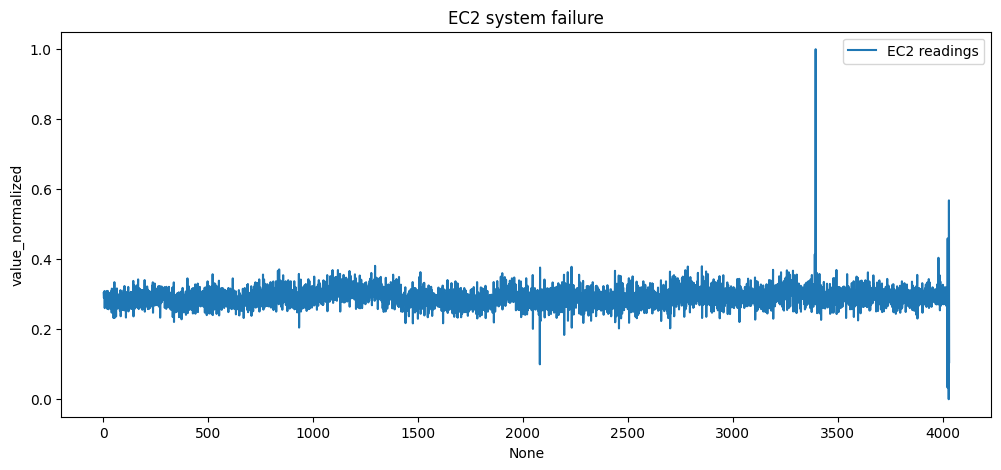

In [42]:
# Visualize Sensor Data
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_test, x=data_test.index, y="value_normalized", label="EC2 readings")
plt.title("EC2 system failure")
plt.show()

In [43]:
data_test.columns

Index(['timestamp', 'value', 'value_mean', 'value_std_dev', 'value_skewness',
       'value_kurtosis', 'value_rolling_mean', 'value_rolling_max',
       'value_rolling_min', 'value_fft_real', 'value_fft_imag', 'value_lag_1',
       'value_lag_2', 'value_lag_3', 'hour', 'day', 'month', 'weekday',
       'value_normalized'],
      dtype='object')

In [44]:
data_test.describe()

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized
count,4029,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.0,4029.000000,4029.000000
mean,2014-03-14 03:47:44.512285952,45.155728,45.162255,1.870050,0.069631,0.188891,45.157903,47.524694,42.862200,0.920104,-0.164787,45.158612,45.153982,45.159691,11.506826,13.658972,3.0,2.998759,0.291838
min,2014-03-07 03:56:00,22.864000,39.145000,0.488968,-2.904545,-2.224578,34.211200,43.850000,22.864000,-1074.202388,-735.360900,22.864000,22.864000,25.352000,0.000000,7.000000,3.0,0.000000,0.000000
25%,2014-03-10 15:51:00,43.944000,44.605800,1.487088,-0.374090,-0.879749,44.552000,46.426000,42.160000,-58.507071,-61.636740,43.944000,43.944000,43.944000,6.000000,10.000000,3.0,1.000000,0.275974
50%,2014-03-14 03:46:00,45.016000,45.052800,1.758361,0.029628,-0.160861,45.041200,47.230000,42.934000,0.451994,-0.008407,45.016000,45.016000,45.018000,12.000000,14.000000,3.0,3.000000,0.290008
75%,2014-03-17 15:46:00,46.362000,45.559000,2.090808,0.475026,0.890996,45.657600,48.334000,43.732000,62.128367,61.545841,46.362000,46.362000,46.362000,18.000000,17.000000,3.0,5.000000,0.307630
max,2014-03-21 03:41:00,99.248000,54.704200,17.364426,2.932898,8.912017,62.680800,99.248000,47.114000,813.546000,735.360900,99.248000,99.248000,99.248000,23.000000,21.000000,3.0,6.000000,1.000000
std,NaN,2.287228,0.898518,1.028570,0.666205,1.496210,1.070631,2.407348,1.617319,100.289851,103.271473,2.276628,2.252544,2.225017,6.919115,4.046571,0.0,2.000310,0.029944


In [45]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4029 entries, 3 to 4031
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           4029 non-null   datetime64[ns]
 1   value               4029 non-null   float64       
 2   value_mean          4029 non-null   float64       
 3   value_std_dev       4029 non-null   float64       
 4   value_skewness      4029 non-null   float64       
 5   value_kurtosis      4029 non-null   float64       
 6   value_rolling_mean  4029 non-null   float64       
 7   value_rolling_max   4029 non-null   float64       
 8   value_rolling_min   4029 non-null   float64       
 9   value_fft_real      4029 non-null   float64       
 10  value_fft_imag      4029 non-null   float64       
 11  value_lag_1         4029 non-null   float64       
 12  value_lag_2         4029 non-null   float64       
 13  value_lag_3         4029 non-null   float64       
 1

### Saving the preprocessed dataset

In [46]:
data_train.to_csv('../data/processed/ec2_request_latency_system_failure_no_anomaly2_preprocessed_train.csv', index=False)
data_test.to_csv('../data/processed/ec2_request_latency_system_failure_preprocessed_test.csv', index=False)